In [1]:
import pandas as pd
%matplotlib inline

In [2]:
adult_data=pd.read_csv("adult.data",na_values=' ?')

In [9]:
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitol-gain,capitonl-loss,hours-per-week,native-country,over50k
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [4]:
adult_data.columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capitol-gain','capitonl-loss','hours-per-week','native-country','over50k']

In [14]:
adult_data['marital-status'].value_counts()
adult_data['native-country'].value_counts()

 United-States                 29169
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [12]:
adult_data['relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

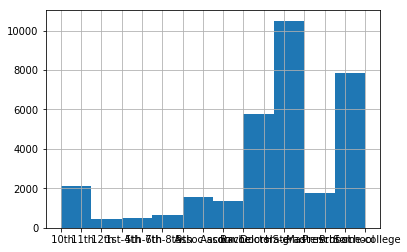

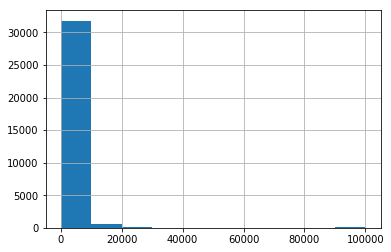

In [8]:
adult_data['capitol-gain'].hist()

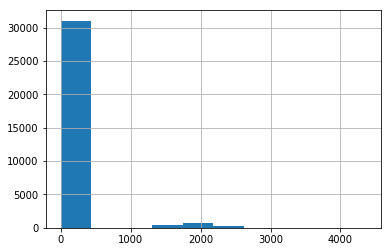

In [9]:
adult_data['capitonl-loss'].hist()

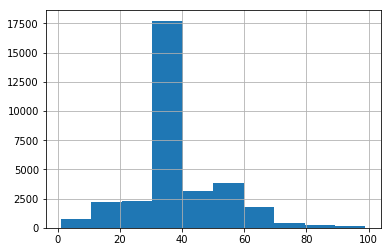

In [10]:
adult_data['hours-per-week'].hist()

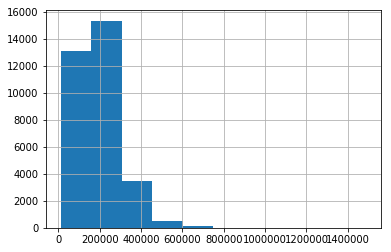

In [11]:
adult_data['fnlwgt'].hist()

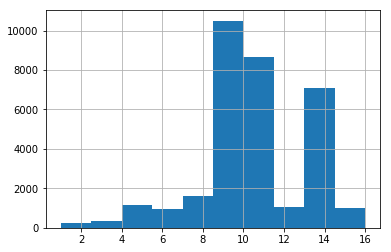

In [12]:
adult_data['education-num'].hist()

In [13]:
adult_data.describe()

,age,fnlwgt,education-num,capitol-gain,capitonl-loss,hours-per-week,over50k
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469,0.240817
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618,0.427586
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfd6a63160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fdfd68c4a20>]], dtype=object)

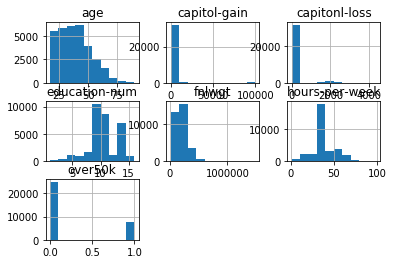

In [14]:
adult_data.hist()

In [15]:
adult_data=adult_data.dropna(axis=1)

In [16]:
adult_data.count()

age               32560
fnlwgt            32560
education         32560
education-num     32560
marital-status    32560
relationship      32560
race              32560
sex               32560
capitol-gain      32560
capitonl-loss     32560
hours-per-week    32560
over50k           32560
dtype: int64

In [17]:
from sklearn import preprocessing


In [18]:
le=preprocessing.LabelEncoder()

In [19]:
transform=adult_data.apply(le.fit_transform)

In [20]:
enc=preprocessing.OneHotEncoder()

In [21]:
enc.fit(transform)

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [22]:
onehot=enc.transform(transform)

In [23]:
onehot=onehot.toarray()

In [24]:
onehot.shape

(32560, 22079)

In [25]:
onehot

array([[ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [26]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split

In [27]:

train, test= train_test_split(onehot,test_size=0.33, random_state=42)

In [28]:
train.shape

(21815, 22079)

In [29]:
from sklearn import svm

In [30]:
x=svm.SVR()

In [31]:
adult_data=adult_data.drop(['sex'],axis=1)

In [32]:
adult_data

,age,fnlwgt,education,education-num,marital-status,relationship,race,capitol-gain,capitonl-loss,hours-per-week,over50k
0,50,83311,Bachelors,13,Married-civ-spouse,Husband,White,0,0,13,0
1,38,215646,HS-grad,9,Divorced,Not-in-family,White,0,0,40,0
2,53,234721,11th,7,Married-civ-spouse,Husband,Black,0,0,40,0
3,28,338409,Bachelors,13,Married-civ-spouse,Wife,Black,0,0,40,0
4,37,284582,Masters,14,Married-civ-spouse,Wife,White,0,0,40,0
5,49,160187,9th,5,Married-spouse-absent,Not-in-family,Black,0,0,16,0
6,52,209642,HS-grad,9,Married-civ-spouse,Husband,White,0,0,45,1
7,31,45781,Masters,14,Never-married,Not-in-family,White,14084,0,50,1
8,42,159449,Bachelors,13,Married-civ-spouse,Husband,White,5178,0,40,1
9,37,280464,Some-college,10,Married-civ-spouse,Husband,Black,0,0,80,1


In [33]:
xtrain,xtest,ytest,ytrain= train_test_split(adult_data.drop(['over50k'],axis=1),adult_data['over50k'],test_size=0.33, random_state=42)

In [34]:
xtest

,age,fnlwgt,education,education-num,marital-status,relationship,race,capitol-gain,capitonl-loss,hours-per-week
14160,38,680390,HS-grad,9,Divorced,Unmarried,White,0,0,20
27047,45,50567,HS-grad,9,Married-civ-spouse,Wife,White,0,0,40
28867,29,185908,Bachelors,13,Married-civ-spouse,Husband,Black,0,0,55
5667,51,306108,Doctorate,16,Never-married,Not-in-family,White,0,0,40
7827,46,124071,Masters,14,Widowed,Not-in-family,White,0,0,44
15382,55,56645,Bachelors,13,Widowed,Own-child,Asian-Pac-Islander,0,0,40
4641,21,315065,7th-8th,4,Never-married,Other-relative,White,0,0,48
8943,19,112432,HS-grad,9,Married-civ-spouse,Husband,White,0,0,58
216,38,182609,Bachelors,13,Married-civ-spouse,Husband,White,0,0,50
5121,34,45522,HS-grad,9,Never-married,Not-in-family,White,0,0,40


In [35]:
xtest

,age,fnlwgt,education,education-num,marital-status,relationship,race,capitol-gain,capitonl-loss,hours-per-week
14160,38,680390,HS-grad,9,Divorced,Unmarried,White,0,0,20
27047,45,50567,HS-grad,9,Married-civ-spouse,Wife,White,0,0,40
28867,29,185908,Bachelors,13,Married-civ-spouse,Husband,Black,0,0,55
5667,51,306108,Doctorate,16,Never-married,Not-in-family,White,0,0,40
7827,46,124071,Masters,14,Widowed,Not-in-family,White,0,0,44
15382,55,56645,Bachelors,13,Widowed,Own-child,Asian-Pac-Islander,0,0,40
4641,21,315065,7th-8th,4,Never-married,Other-relative,White,0,0,48
8943,19,112432,HS-grad,9,Married-civ-spouse,Husband,White,0,0,58
216,38,182609,Bachelors,13,Married-civ-spouse,Husband,White,0,0,50
5121,34,45522,HS-grad,9,Never-married,Not-in-family,White,0,0,40


In [36]:
xtest=xtest.drop(['education','marital-status','relationship','race'],axis=1)

In [37]:
xtrain=xtrain.drop(['education','marital-status','relationship','race'],axis=1)

In [38]:
xtrain

,age,fnlwgt,education-num,capitol-gain,capitonl-loss,hours-per-week
16068,44,124924,9,0,0,40
27584,51,123429,14,0,0,50
18010,44,387770,10,0,0,15
22472,32,111836,10,0,0,50
4585,21,152540,9,0,0,35
11191,47,109832,9,5178,0,30
23245,62,138157,9,0,0,12
25871,23,240137,3,0,0,55
23672,47,191175,3,0,2179,50
16649,23,190290,13,0,0,40


In [39]:
xtrain.shape

(21815, 6)

In [40]:
ytrain.shape

(10745,)

In [41]:
ytest.shape

(21815,)

In [42]:
curve=x.fit(xtrain,ytest)

In [43]:
pred=curve.predict(xtest)


In [44]:
pred.max()

0.90041786207564156

In [45]:
x.set_params()


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [46]:
x.shape_fit_

(21815, 6)

In [58]:
sum=ytest.bool

In [49]:
xtrain

,age,fnlwgt,education-num,capitol-gain,capitonl-loss,hours-per-week
16068,44,124924,9,0,0,40
27584,51,123429,14,0,0,50
18010,44,387770,10,0,0,15
22472,32,111836,10,0,0,50
4585,21,152540,9,0,0,35
11191,47,109832,9,5178,0,30
23245,62,138157,9,0,0,12
25871,23,240137,3,0,0,55
23672,47,191175,3,0,2179,50
16649,23,190290,13,0,0,40


In [59]:
sum

<bound method NDFrame.bool of 16068    0
27584    1
18010    0
22472    0
4585     0
11191    1
23245    0
25871    0
23672    0
16649    0
24655    0
4417     0
30488    0
8965     1
31601    0
15322    0
29710    0
4041     1
31532    1
1654     1
26633    0
31317    0
17265    0
20573    0
17838    0
16319    1
16338    0
26897    0
23361    0
13687    0
        ..
5051     0
5311     0
2433     0
23333    1
32157    0
30187    1
26967    0
769      0
32052    0
1685     0
8322     0
16023    0
27495    0
11363    0
28020    0
14423    0
21962    0
4426     0
29910    0
16850    0
6265     0
22118    0
11284    0
11964    0
21575    0
29802    1
5390     0
860      0
15795    0
23654    0
Name: over50k, Length: 21815, dtype: int64>